### Simple Q-Learning Agents in Gridworld

Author: Jacob Gordon 


In [8]:
#define Gridworld 

import numpy as np


class Gridworld:
    
    def __init__(self):
        #"LEFT,RIGHT,UP,DOWN"
        self.actions = {0: (-1,0),1:(1,0),2:(0,1),3:(0,-1)}


        self.board_length= 9
        self.board_height= 6

        self.obstacles = [i+2*self.board_length for i in range(8)]
        self.done = False
        self.goal = 8 + self.board_length * 5
        self.start = 3 + self.board_length * 0
        self.score = 0
        self.player = self.start

    def move(self,action):
        state = self.player
        new_state = (state + (self.actions[action][0] + self.board_length*self.actions[action][1]))
        #if new state is valid
        if(new_state not in self.obstacles and self.board_length * self.board_height > new_state > 0 ):
            if(new_state ==self.goal):
                self.done = True
                self.score = 1
               # print "Winner!"
        else:
            new_state = state
            self.score = 0
            #print "You can't do that"
        self.player = new_state
        self.board()
        return (new_state,self.score,self.done)
    def reset(self,e):
        
        self.done = False
        self.score = 0
        self.player = self.start
        self.obstacles = self.obstacles if e < 2000 else [i+2*self.board_length for i in range(1,9)]
        #print self.player,self.goal
        #self.board()
        return self.player
        
    def board(self):
        state = self.player
        
        #go through every row, then every element in that row
        #Format it into a string, and print to console
        s = ""
        board = []
        for i in range(self.board_length*self.board_height):
            #print(i,j)
            if (i % 9 == 0 ):
                
                board.append(s)
                s = ""
            if i in self.obstacles:
                s+= "[X]\t"
            elif i == self.player:
                s+="[A]\t"
                print
            elif i == self.goal:
                s+="[G]\t"
            elif i == self.start:
                s+="[S]\t"
            else:
                s+="[ ]\t"
        board.append(s)
        for i in board[::-1]: print i
        print('\n')

## Part 1 : Simple Q-Learning Agent

In [20]:


#Implement Q-learning Algorithm 1 for solving Gridworld

#epsilon-greedy policy : at each step with a small probability epsilon[0,1] a random action is taken, and with probability 1 epsilon an action maximixing current estiamte q is taken

import random
import numpy as np
import time


env = Gridworld()
A = env.actions

random.seed(41)

alpha = 0.4
epsilon = 0.2
gamma = 0.95
n_episodes = 2250
n_moves = 0


#Initialize State and Q
Q = np.zeros([env.board_length*env.board_height,len(env.actions)])
S = range(env.board_length*env.board_height)

plot = []
for e in range(n_episodes):
    s = env.reset(e)
    done = False
    n_moves = 0
    while True:
        a = random.choice(A.keys()) if random.uniform(0,1) <= epsilon else np.argmax(Q[s])
        s_next, reward, done = env.move(a)
        Q[s][a] =  Q[s][a] + alpha * ( reward + gamma * np.max(Q[s_next]) - Q[s][a])
        s = s_next
        n_moves +=1
        if done:
            break
    print e, np.mean(Q)
    plot.append([e, np.mean(Q)])




0 0.001851851851851852
1 0.003666666666666667
2 0.007666074074074074
3 0.009422814814814816
4 0.011144420740740743
5 0.012831594548148148
6 0.014485024879407407
7 0.016105386604041483
8 0.017693341094182875
9 0.019342630186868222
10 0.020933132476040762
11 0.025570246562103143
12 0.028171929262452426
13 0.029600580174823806
14 0.03099220307548783
15 0.035479865587756905
16 0.03841367306567168
17 0.0453964424378671
18 0.046490304604430994
19 0.049956245576742005
20 0.052460069049505585
21 0.05613652900328419
22 0.058863604812947924
23 0.059492455683636175
24 0.06175501091153427
25 0.06292217606173557
26 0.06607437656967002
27 0.06708558970713804
28 0.06734596013370069
29 0.06965472161171109
30 0.07477180806523201
31 0.07490576578732629
32 0.0766825518554132
33 0.0781260061109332
34 0.0815547738026571
35 0.08332800060292277
36 0.08452818727025228
37 0.08720154961818807
38 0.08832385067654007
39 0.0916641746932675
40 0.09167890305585658
41 0.0939182756088954
42 0.09750987934949241
43 0.09

721 0.2755765085398405
722 0.2755765085454322
723 0.2755765086671647
724 0.2755765086671647
725 0.27559718330421995
726 0.27559718332535704
727 0.2755971833254283
728 0.27559718332813465
729 0.27559718332813465
730 0.2799330362635371
731 0.2799330362709273
732 0.2799330362711387
733 0.2799330362727746
734 0.27993303627295696
735 0.2799330362843999
736 0.27993303628444416
737 0.27993303628465505
738 0.2799330362852775
739 0.2799330362852775
740 0.27993303628629124
741 0.279933036397287
742 0.279933036397287
743 0.2799330363972982
744 0.27993303640044503
745 0.2799330364654686
746 0.27993303646584206
747 0.2799330364673718
748 0.27993303649421325
749 0.2799330364980276
750 0.2799330364980276
751 0.2799373027926209
752 0.27993730279382867
753 0.2799373027938435
754 0.2799373027938941
755 0.2799373027963052
756 0.2799373028100477
757 0.2799373028109399
758 0.27993730281116364
759 0.279937302827096
760 0.28140007059374483
761 0.2823527095386397
762 0.2823527095411699
763 0.28235270954170527

1208 0.29936936022036176
1209 0.29936936022036176
1210 0.29936936022036176
1211 0.2993693602203618
1212 0.2993693602203647
1213 0.2993693602203665
1214 0.2993693602203665
1215 0.2993693602203665
1216 0.2993693602203665
1217 0.2993693602203665
1218 0.30041626022036866
1219 0.30041626022036866
1220 0.30041626022036866
1221 0.30041626022036866
1222 0.30041626022036866
1223 0.30041626022036866
1224 0.30041626022036866
1225 0.30041626022036866
1226 0.30041626022036866
1227 0.30041626022036866
1228 0.30041626022036866
1229 0.30041626022036866
1230 0.30041626022036866
1231 0.30041626022036866
1232 0.30062203023237516
1233 0.30062203023237516
1234 0.30062203023237516
1235 0.3006220302323762
1236 0.3006220302323768
1237 0.3006220302323768
1238 0.3006220302323769
1239 0.3006220302323769
1240 0.3006220302323769
1241 0.3006220302323769
1242 0.3006220302323769
1243 0.3006220302323769
1244 0.3006220302323769
1245 0.3006220302323769
1246 0.3006220302323769
1247 0.30062203023237805
1248 0.300622030232

1670 0.3191562332044579
1671 0.3191562332044579
1672 0.3191562332044579
1673 0.3191562332044579
1674 0.3191562332044579
1675 0.3191562332044579
1676 0.3191562332044579
1677 0.3191562332044579
1678 0.3191562332044579
1679 0.31941998356619206
1680 0.31941998356619206
1681 0.31941998356619206
1682 0.3194262134510929
1683 0.3194262134510929
1684 0.3194262134510929
1685 0.3194262134510929
1686 0.3194262134510929
1687 0.3194262134510929
1688 0.3194262134510929
1689 0.3194262134510929
1690 0.3194262134510929
1691 0.3194262134510929
1692 0.3194262134510929
1693 0.3194262134510929
1694 0.3194262134510929
1695 0.3194262134510929
1696 0.3194262134510929
1697 0.3194262134510929
1698 0.3194262134510929
1699 0.3196686921039938
1700 0.3196686921039938
1701 0.3196686921039938
1702 0.3196686921039938
1703 0.3196686921039938
1704 0.3196686921039938
1705 0.32017232824545544
1706 0.32017232824545544
1707 0.32017232824545544
1708 0.32017232824545544
1709 0.32017232824545544
1710 0.32017232824545544
1711 0.

2087 0.30096006741307063
2088 0.30184495717500387
2089 0.3018449571750041
2090 0.30203256710627646
2091 0.30203256710627663
2092 0.3020325671062767
2093 0.30203256710627674
2094 0.30203256710627674
2095 0.3020325671062768
2096 0.3021268804958171
2097 0.3022394464545804
2098 0.30241880897074513
2099 0.3027054950087307
2100 0.3027054950087307
2101 0.3029562830023027
2102 0.30296030507512434
2103 0.30296030507512434
2104 0.3032222593820056
2105 0.3037294763560849
2106 0.30428296352867173
2107 0.30428296352867173
2108 0.30454278091764864
2109 0.30454278091764864
2110 0.30825196797960247
2111 0.3098494546034696
2112 0.3098594228652515
2113 0.31002800954909027
2114 0.31002800954909027
2115 0.3100495463443756
2116 0.3101806735678648
2117 0.3101806735678648
2118 0.3101806735678648
2119 0.3102250533933706
2120 0.31170436169238996
2121 0.31172241169238996
2122 0.3117237942401933
2123 0.31195106603124406
2124 0.31208716987062207
2125 0.31224373872914507
2126 0.31224373872914507
2127 0.31228539289

### Model Evaluation

- Model improves total reward over time
- When board changes at game 2000, quickly adapts and improves total score

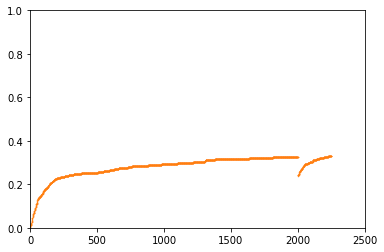

0.29319708652616405


[]

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(plot,'o',markersize=0.5)
plt.axis([0,2500,0,1], dotwidth=0.2)
plt.show()

print np.median([j for i,j in plot])

([(1,i) for i,j in plot if j >50])

## Part 2 : Asynchronous Q-Learning W/ Multiple Agents

In [2]:
from threading import Thread
from threading import Semaphore
## defining our agent as a class that can be threaded


import random
import numpy as np
import time

env = Gridworld()
A = env.actions
random.seed(41)
alpha = .2
epsilon = .5
gamma = 0.95
n_episodes = 2250
n_moves = 0
AsyncUpdate = 5


#Initialize State and Q
Q = np.zeros([env.board_length*env.board_height,len(env.actions)])
S = range(env.board_length*env.board_height)
T = 0
#make writing to global Q thread safe with Semaphore
writingQ = Semaphore(1)

class agent(Thread):
    def __init__(self,alpha, epsilon,gamma, n_episodes,S,A):
        Thread.__init__(self)
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_episodes=n_episodes
        self.delta_Q = np.zeros([env.board_length*env.board_height,len(env.actions)])
        self.S = S
        self.A = A
        self.plot = []

    def run(self):
        for e in range(self.n_episodes):
            s = env.reset(e)
            done = False
            n_moves = 0
            while True:
                a = random.choice(self.A.keys()) if random.uniform(0,1) <= self.epsilon else np.argmax(Q[s])
                s_next, reward, done = env.move(a)
                self.delta_Q[s][a] =self.delta_Q[s][a] + self.alpha * ( reward + self.gamma * np.max(Q[s_next]) - Q[s][a])
                s = s_next
                
                if n_moves % AsyncUpdate == 0:
                    self.update()
                if done:
                    self.update()
                    break
                n_moves +=1
                #T += 1
            self.plot.append([e, np.mean(Q)])
    def update(self):
        writingQ.acquire()
        for i in range(54):
            for j in range(4):
                Q[i][j] = Q[i][j] + self.alpha * self.delta_Q[i][j]
        self.delta_Q = np.zeros([env.board_length*env.board_height,len(env.actions)])
 
        writingQ.release()
a1 = agent(alpha,epsilon,gamma,n_episodes,S,A)
a2 = agent(alpha,epsilon,gamma,n_episodes,S,A)
a3 = agent(alpha,epsilon,gamma,n_episodes,S,A)


a1.start()
a2.start()
a3.start()

a1.join()
a2.join()
a3.join()


## Model Evaluation

- Plots of the three agents performance overtime
- Model outperforms the single agent, and does not have as dramatic of a decrease in performance after the changing board!

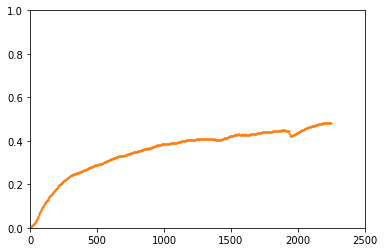

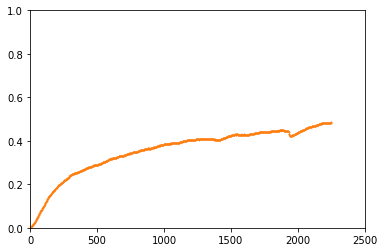

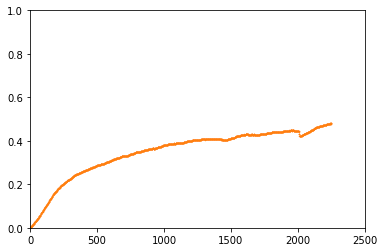

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(a1.plot,'o',markersize=0.5)
plt.axis([0,2500,0,1], dotwidth=0.2)
plt.show()

plt.plot(a2.plot,'o',markersize=0.5)
plt.axis([0,2500,0,1], dotwidth=0.2)
plt.show()

plt.plot(a3.plot,'o',markersize=0.5)
plt.axis([0,2500,0,1], dotwidth=0.2)
plt.show()